### Import data

In [1]:
include("importData.jl")
include("DDEmodel.jl")
include("plot.jl")

# import data from the path

# lapatinib
pop_l, g2_l, g1_l, g1_0_l, g2_0_l = import_data(joinpath("..", "data", "lap.csv"),
        joinpath("..", "data", "lap_pop.csv"));

# # doxorubicin
# pop_d, g2_d, g1_d, g1_0_d, g2_0_d = import_data(joinpath("..", "data", "dox.csv"),
#         joinpath("..", "data", "dox_pop.csv"));

# # gemcitabine
# pop_g, g2_g, g1_g, g1_0_g, g2_0_g = import_data(joinpath("..", "data", "gem.csv"),
#         joinpath("..", "data", "gem_pop.csv"));

# # paclitaxel
# pop_t, g2_t, g1_t, g1_0_t, g2_0_t = import_data(joinpath("..", "data", "taxol1.csv"),
#         joinpath("..", "data", "taxol1_pop.csv"));

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:30
└ @ Main /home/farnazm/dde/improve_fit/DrugResponseModel.jl/src/importData.jl:30
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = import_data(::String, ::String) at importData.jl:57
└ @ Main /home/farnazm/dde/improve_fit/DrugResponseModel.jl/src/importData.jl:57


### Estimate 

In [2]:
# initial guess
initial_guess  = [0.02798, 0.025502, 0.0001, 0.0001]

# bounds 
# lower_bnd = [-6.0, -6.0, 2.0, 2.0, -8.0, -8.0]
# upper_bnd = [0.0, 0.0, 6.0, 6.0, 0.0, 0.0]
lower_bnd = [-6.0, -6.0, -7.0, -7.0]
upper_bnd = [0.001, 0.001, 0.0, 0.0]
bound = collect(zip(lower_bnd, upper_bnd))

# max number of steps
maxSteps = 1e4
j = 5
par = optimization(g1_l, g2_l, g1_0_l, g2_0_l, initial_guess, j, bound, maxSteps)
# parameters = zeros(4, 6, 8)
# for j in 1:8
#     parameters[1, :, j] = optimization(g1_l, g2_l, g1_0_l, g2_0_l, initial_guess, j, bound, maxSteps)
#     parameters[2, :, j] = optimization(g1_d, g2_d, g1_0_d, g2_0_d, initial_guess, j, bound, maxSteps)
#     parameters[3, :, j] = optimization(g1_g, g2_g, g1_0_g, g2_0_g, initial_guess, j, bound, maxSteps)
#     parameters[4, :, j] = optimization(g1_t, g2_t, g1_0_t, g2_0_t, initial_guess, j, bound, maxSteps)
# end

Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps

Optimization stopped after 10001 steps and 39.30 seconds
Termination reason: Max number of steps (10000) reached
Steps per second = 254.50
Function evals per second = 257.94
Improvements/step = 0.22010
Total function evaluations = 10136


Best candidate found: [-3.08988, -2.89806, -7.0, -3.58297]

Fitness: 7986.165035342



4-element Array{Float64,1}:
 0.045507371920900874 
 0.05513002850154806  
 0.0009118862571633387
 0.02779314329566442  

In [3]:
# using CSV
# # saving all the parameters for all the drugs
# CSV.write("Parameters_L.csv",  DataFrame(parameters[1,:,:]), writeheader=true)
# CSV.write("Parameters_D.csv",  DataFrame(parameters[2,:,:]), writeheader=true)
# CSV.write("Parameters_G.csv",  DataFrame(parameters[3,:,:]), writeheader=true)
# CSV.write("Parameters_T.csv",  DataFrame(parameters[4,:,:]), writeheader=true)

In [4]:
# using Plots;
# to call the concentrations for each drug
# param_lap_dde = CSV.read(joinpath("..", "data", "params_lap_DDE.csv"))
# conc_l = [param_lap_dde[8,col] for col in 2:9]
# param_dox_dde = CSV.read(joinpath("..", "data", "params_dox_DDE.csv"))
# conc_d = [param_dox_dde[8,col] for col in 2:9]
# param_gem_dde = CSV.read(joinpath("..", "data", "params_gem_DDE.csv"))
# conc_g = [param_gem_dde[8,col] for col in 2:9]
# param_tax_dde = CSV.read(joinpath("..", "data", "params_taxol1_DDE.csv"))
# conc_t = [param_tax_dde[8,col] for col in 2:9]

# k shows the DDE parameter we want to look at the hill curve for
# k = 1: alpha
# k = 2: beta
# k = 3: tau1
# k = 4: tau2
# k = 5: gamma1
# k = 6: gamma2
# k=6
# p1 = plot(conc_l, parameters[1,k,:], label = "Lapatinib", title = "", xlabel = "drug conc. [nM]", ylabel = "param", yticks = 0.0:round(maximum(parameters[1,k,:])/5 ,digits = 4):maximum(parameters[1,k,:]))
# p2 = plot(conc_d, parameters[2,k,:], label = "Doxorubicin", xlabel = "drug conc. [nM]", ylabel = "param", yticks = 0.0:round(maximum(parameters[2,k,:])/5, digits = 4):maximum(parameters[2,k,:]))
# p3 = plot(conc_g, parameters[3,k,:], label = "Gemcitabine", xlabel = "drug conc. [nM]", ylabel = "param", yticks = 0.0:round(maximum(parameters[3,k,:])/5, digits = 4):maximum(parameters[3,k,:]))
# p4 = plot(conc_t, parameters[4,k,:], label = "Paclitaxel", xlabel = "drug conc. [nM]", ylabel = "param", yticks = 0.0:round(maximum(parameters[4,k,:])/5, digits = 4):maximum(parameters[4,k,:]))
# plot(p1, p2, p3, p4, dpi = 100)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = plotIt(::Array{Float64,1}, ::Array{Float64,2}, ::Array{Float64,2}, ::Array{Float64,1}, ::Array{Float64,1}, ::DataFrame, ::Int64, ::String) at plot.jl:32
└ @ Main /home/farnazm/dde/improve_fit/DrugResponseModel.jl/src/plot.jl:32


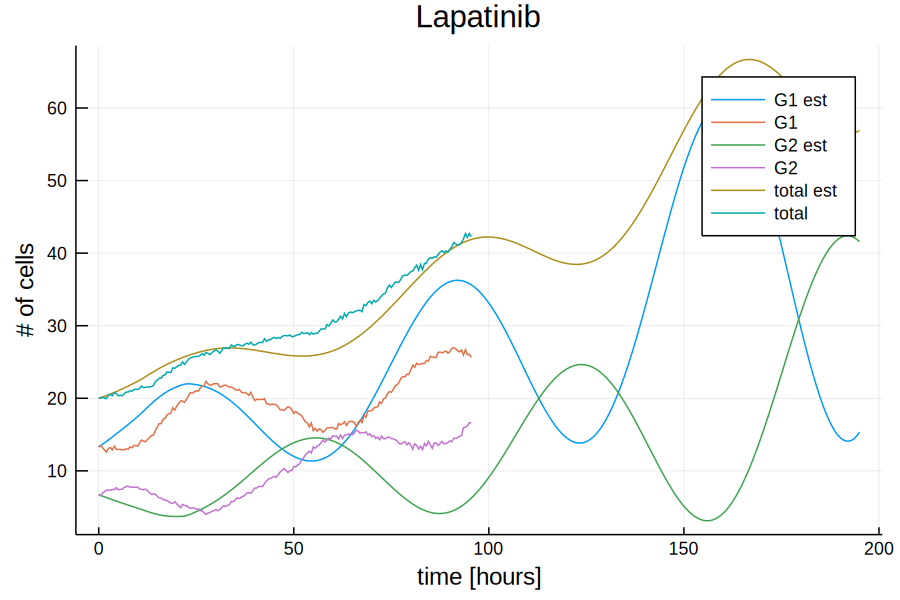

In [5]:
# include("plot.jl")
# j showas the trial number, which could be from 1:control, ..., 8: maximum drug concentraation
j = 5
plotIt(par, g1_l, g2_l, g2_0_l, g1_0_l, pop_l, j, "Lapatinib")